# Data Importation and Initial Exploratory Analysis

In [1]:
#Import required packages for project# notice total instances, counts in each column, and data types
import pandas as pd
import numpy as np

In [2]:
#Import data using pandas read_csv function
car_data = pd.read_csv("/Users/christopherbond/Desktop/Car_Insurance_Claim.csv")

In [3]:
#View column and first five rows of data
car_data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
#Our dataframe has 19 columns and 10000 rows
car_data.shape

(10000, 19)

In [5]:
# We have a mixture of categorical and numerical columns. CREDIT_SCORE and ANNUAL_MILEAGE also have null values.
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [6]:
#Summary of numerical attributes
round(car_data.describe(),0)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.0,9018.0,10000.0,10000.0,10000.0,10000.0,9043.0,10000.0,10000.0,10000.0,10000.0
mean,500522.0,1.0,1.0,0.0,1.0,19865.0,11697.0,1.0,0.0,1.0,0.0
std,290031.0,0.0,0.0,1.0,0.0,18916.0,2818.0,2.0,1.0,2.0,0.0
min,101.0,0.0,0.0,0.0,0.0,10238.0,2000.0,0.0,0.0,0.0,0.0
25%,249638.0,0.0,0.0,0.0,0.0,10238.0,10000.0,0.0,0.0,0.0,0.0
50%,501777.0,1.0,1.0,0.0,1.0,10238.0,12000.0,0.0,0.0,0.0,0.0
75%,753974.0,1.0,1.0,1.0,1.0,32765.0,14000.0,2.0,0.0,2.0,1.0
max,999976.0,1.0,1.0,1.0,1.0,92101.0,22000.0,22.0,6.0,15.0,1.0


In [7]:
#Confirmation of null values
car_data.isna().sum().sort_values(ascending=False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

# Feature and target extraction and generate training and testing data.

In [8]:
#Extracted the OUTCOME column as our target column 
car_data_target = car_data.loc[:,"OUTCOME"]

#Dropped the OUTCOME column as our feature database
car_data_features = car_data.drop(["OUTCOME"], axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

# Split targets and features into an 80% training set and 20% testing set. X_train and X_test will be 
# feature attributes while y_train and y_test will be the targets. 

X_train, X_test = train_test_split(car_data_features, test_size=0.2, random_state = 42)
y_train, y_test = train_test_split(car_data_target, test_size=0.2, random_state = 42)

In [10]:
#I dropped the ID and Postal Code columns from the training data not desiring 
# them to play a role in the remaining portion of the project.
X_train = X_train.drop(["ID","POSTAL_CODE"], axis = 1)
X_train.head(1)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
9254,65+,female,majority,30y+,high school,upper class,0.545417,1.0,after 2015,1.0,1.0,8000.0,sedan,4,0,6


In [11]:
#I dropped the ID and Postal Code columns from the test data not desiring 
# them to play a role in the remaining portion of the project.
X_test = X_test.drop(["ID","POSTAL_CODE"], axis = 1)
X_test.head(1)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
6252,26-39,female,majority,10-19y,high school,middle class,0.541596,0.0,before 2015,1.0,1.0,11000.0,sedan,1,0,0


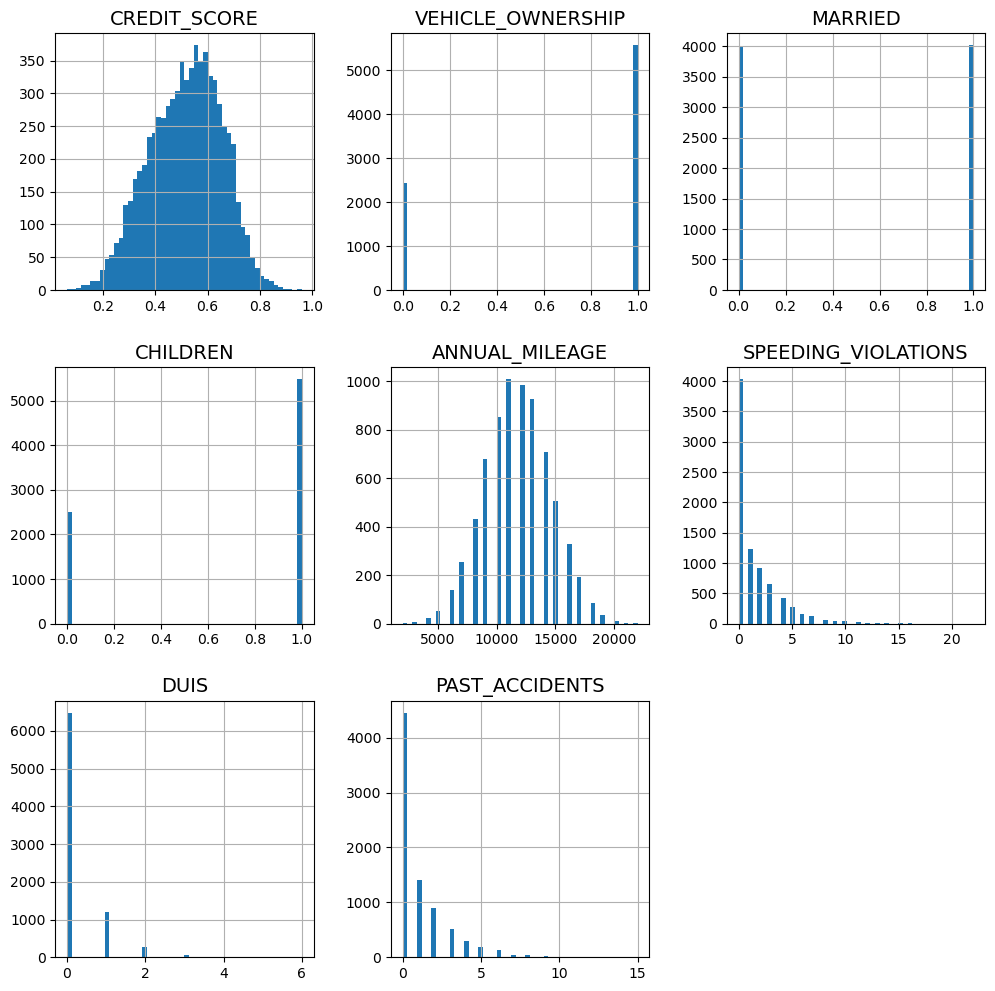

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plots histograms of numerical data
X_train.hist(bins=50, figsize=(12, 12))
plt.show()

# Data Processing and Pipeline Generation

In [13]:
#Generated list of feature names.
list(car_data)

['ID',
 'AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'VEHICLE_TYPE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

In [14]:
#Exploring each categorical feature to determine binary versus multilabel features.
car_data['VEHICLE_TYPE'].unique()

array(['sedan', 'sports car'], dtype=object)

In [15]:
#Binary and ordinal data which will be ordinal encoded.
car_data_ordinal = car_data[['GENDER',
                             'RACE',
                             'VEHICLE_OWNERSHIP',
                             'VEHICLE_YEAR',
                              'MARRIED',
                              'CHILDREN',
                              'VEHICLE_TYPE',
                              'SPEEDING_VIOLATIONS',
                              'DUIS',
                              'PAST_ACCIDENTS']]

In [16]:
#Multi label data which will be one hot encoded.
car_data_one_hot = car_data[['AGE',
                             'DRIVING_EXPERIENCE',
                             'EDUCATION',
                             'INCOME']]

In [17]:
#Continuous numerical data
car_data_numerical = car_data[['CREDIT_SCORE',
                               'ANNUAL_MILEAGE'
                              ]]

In [18]:
#Importation of required classes for a continuous data pipeline. 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#Generation of continuous data pipeline imputing the median value for null data and scaling the data.
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [19]:
#Importation of required classes for an ordinal encoding pipeline. 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

#Generation of binary and ordinal data pipeline imputing the most frequently used value for null data 
#and ordinal encoding the data.
ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

ordinal_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [20]:
#Importation of required classes for a one hot encoding pipeline. 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

#Generation of multi value pipeline imputing the most frequently used value for null data 
# and one hot encoding the data.
one_hot_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop='first',handle_unknown = "ignore"))

one_hot_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(drop='first', handle_unknown='ignore'))])

In [21]:
#Imported column transformer to transform all dataframe columns simultaneously.
from sklearn.compose import ColumnTransformer


#All columns names being utilized broken down into either continuous numerical attributes, ordinal attributes,
# or one_hot_encoded attributes. 

car_data_num_attrib = ['CREDIT_SCORE',
                       'ANNUAL_MILEAGE'
                      ]

car_data_ord_attrib = ['GENDER',
                       'RACE',
                       'VEHICLE_OWNERSHIP',
                       'VEHICLE_YEAR',
                       'MARRIED',
                       'CHILDREN',
                       'VEHICLE_TYPE',
                       'SPEEDING_VIOLATIONS',
                       'DUIS',
                       'PAST_ACCIDENTS'
                        ]

car_data_one_hot_attrib = ['AGE',
                           'DRIVING_EXPERIENCE',
                           'EDUCATION',
                           'INCOME'
                          ]

#Generation of column transformer pipeline. 
preprocessing = ColumnTransformer([
        ("cont", num_pipeline, car_data_num_attrib),
        ("ordinal", ordinal_pipeline, car_data_ord_attrib),
        ("one_hot", one_hot_pipeline, car_data_one_hot_attrib),
    ])


preprocessing

#Fit and transform the X_train data
X_train_prepared = preprocessing.fit_transform(X_train)

# Model Generation and Initial Analysis

In [22]:
#Import RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

#Instantiate our RandomForestClassifier rnd_clf using preprocessing pipeline.
rnd_clf = RandomForestClassifier(random_state = 42)

#Fit classifier to training data.
rnd_clf.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=42)

In [23]:
#Import cross_val_predict class from sklearn
from sklearn.model_selection import cross_val_predict

#Generate predictions using cross_val_predict class with 5 folds.
rnd_clf_preds = cross_val_predict(rnd_clf, X_train_prepared, y_train, cv=5)

In [24]:
# Imported accuracy_score, precision_score, and recall score classes from sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Generated scoring metrics using y_train data (actual values) and rnd_clf predict values (predicted values)
rnd_acc_score = round(accuracy_score(y_train, rnd_clf_preds),4)
rnd_prec_score = round(precision_score(y_train, rnd_clf_preds),4)
rnd_recall_score = round(recall_score(y_train, rnd_clf_preds),4)

#Printed all three scores 
print(rnd_acc_score)
print(rnd_prec_score)
print(rnd_recall_score)

0.816
0.7319
0.6488


In [25]:
#Import LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

#Instantiate the LogisticRegression object log_reg_clf.
log_reg_clf = LogisticRegression(random_state = 42)

#Fit classifier to training data.
log_reg_clf.fit(X_train_prepared, y_train)

LogisticRegression(random_state=42)

In [26]:
#Generate predictions using cross_val_predict class with 5 folds.
log_reg_clf_preds = cross_val_predict(log_reg_clf, X_train_prepared, y_train, cv=5)

In [27]:
# Generated scoring metrics using y_train data (actual values) and log_reg_clf.predict values (predicted values)
log_reg_acc_score = round(accuracy_score(y_train, log_reg_clf_preds),4)
log_reg_prec_score = round(precision_score(y_train, log_reg_clf_preds),4)
log_reg_recall_score = round(recall_score(y_train, log_reg_clf_preds),4)

#Printed all three score metrics. 
print(log_reg_acc_score)
print(log_reg_prec_score)
print(log_reg_recall_score)

0.8385
0.7575
0.7108


In [28]:
#Import SGDClassifier model from sklearn
from sklearn.linear_model import SGDClassifier

#Instantiate the SGDClassifier object sgd_clf
sgd_clf = SGDClassifier(random_state=42)

#Fit classifier to training data.
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [29]:
#Generate predictions using cross_val_predict class with 5 folds.
sgd_clf_preds = cross_val_predict(sgd_clf, X_train_prepared, y_train, cv=5)

In [30]:
#Generated scoring metrics using y_train data (actual values) and sgd_clf_preds predict values(predicted values)
sgd_clf_acc_score = round(accuracy_score(y_train, sgd_clf_preds),4)
sgd_clf_prec_score = round(precision_score(y_train, sgd_clf_preds),4)
sgd_clf_recall_score = round(recall_score(y_train, sgd_clf_preds),4)

#Printed all three scores 
print(sgd_clf_acc_score)
print(sgd_clf_prec_score)
print(sgd_clf_recall_score)

0.829
0.7769
0.6352


In [31]:
#import DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

#create a DecisionTreeClassifier object called tree_clf with a random_state of 42
tree_clf = DecisionTreeClassifier(random_state = 42)

#Fit classifier to training data.
tree_clf.fit(X_train_prepared,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
#Generate predictions using cross_val_predict class with 5 folds.
tree_clf_preds = cross_val_predict(tree_clf, X_train_prepared, y_train, cv=5)

In [33]:
# Generated scoring metrics using y_train data (actual values) and rnd_clf.predict values (predicted values)
tree_clf_acc_score = round(accuracy_score(y_train, tree_clf_preds),4)
tree_clf_prec_score = round(precision_score(y_train, tree_clf_preds),4)
tree_clf_recall_score = round(recall_score(y_train, tree_clf_preds),4)

#Printed all three scores 
print(tree_clf_acc_score)
print(tree_clf_prec_score)
print(tree_clf_recall_score)

0.7551
0.6066
0.6156


In [34]:
#Import SVC model from sklearn
from sklearn.svm import SVC

#create a SVC object called tree_clf with a random_state of 42
svc_clf = SVC(random_state = 42)

#fit SVC object on the training data.
svc_clf.fit(X_train_prepared,y_train)

SVC(random_state=42)

In [35]:
#Generate predictions using cross_val_predict class with 5 folds.
svc_preds = cross_val_predict(svc_clf, X_train_prepared, y_train, cv=5)

In [36]:
# Generated scoring metrics using y_test data (actual values) and svc_clf.predict values (predicted values)
svc_acc_score = round(accuracy_score(y_train, svc_preds),4)
svc_prec_score = round(precision_score(y_train, svc_preds),4)
svc_recall_score = round(recall_score(y_train, svc_preds),4)

#Printed all three scores 
print(svc_acc_score)
print(svc_prec_score)
print(svc_recall_score)

0.8331
0.7525
0.6944


In [37]:
from sklearn.ensemble import VotingClassifier

log_clf = make_pipeline(preprocessing,LogisticRegression())
rnd_clf = make_pipeline(preprocessing,RandomForestClassifier())
svc_clf = make_pipeline(preprocessing,SVC(probability=True))

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svc_clf)],
    voting = "soft")
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('cont',
                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('standardscaler',
                                                                                                 StandardScaler())]),
                                                                                ['CREDIT_SCORE',
                                                                                 'ANNUAL_MILEAGE']),
                                                                               ('ordinal',
                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('ordinalenco...
                                                                                 'VEHICLE_YEAR',
                                                                                 'MARRIED',
                                                                                 'CHILDREN',
                                                                                 'VEHICLE_TYPE',
                                                                                 'SPEEDING_VIOLATIONS',
                                                                                 'DUIS',
                                                                                 'PAST_ACCIDENTS']),
                                                                               ('one_hot',
                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('onehotencoder',
                                                                                                 OneHotEncoder(drop='first',
                                                                                                               handle_unknown='ignore'))]),
                                                                                ['AGE',
                                                                                 'DRIVING_EXPERIENCE',
                                                                                 'EDUCATION',
                                                                                 'INCOME'])])),
                                              ('svc',
                                               SVC(probability=True))]))],
                 voting='soft')

In [38]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

Pipeline 0.846
Pipeline 0.82
Pipeline 0.838
VotingClassifier 0.8335


In [39]:
#Logistic Regression Classifier GridSearch

#Import the GridSearchCV class from the sklearn.model_selection library
from sklearn.model_selection import GridSearchCV

#Create a dictionary of search parameters called param_grid
param_grid = [{'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20),'solver' : ['liblinear']}]

#Instantiate LogisticRegression model
opt_log_reg = LogisticRegression()

#Instantiate a grid search. 
opt_log_reg_search_cv = GridSearchCV(opt_log_reg,param_grid,cv=3)

#Run grid search on training data. 
opt_log_reg_search_cv.fit(X_train_prepared, y_train)

# Print the best combination of chosen hyperparamters for our model.
print("The best parameters are: ", opt_log_reg_search_cv.best_params_)

The best parameters are:  {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}


In [40]:
#Generate a logistic regression model with optimal hyperparamter values.
best_log_reg_model = opt_log_reg_search_cv.best_estimator_

#Generate predictions of X_train_transformed data.
best_log_reg_preds = best_log_reg_model.predict(X_train_prepared)

In [41]:
# Generated scoring metrics using y_train data (actual values) and best_log_reg_clf.predict values (predicted values)
best_log_reg_acc_score = accuracy_score(y_train, best_log_reg_preds)
best_log_reg_prec_score = precision_score(y_train, best_log_reg_preds)
best_log_reg_recall_score = recall_score(y_train, best_log_reg_preds)

#Printed all three scores 
print(best_log_reg_acc_score)
print(best_log_reg_prec_score)
print(best_log_reg_recall_score)

0.842125
0.7624098430207892
0.7188


In [42]:
#SVC GridSearch

#Import the GridSearchCV class from the sklearn.model_selection library
from sklearn.model_selection import GridSearchCV

#Create a dictionary of search parameters called param_grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

#Instantiate SVC model
opt_SVC = SVC()

#Instantiate a grid search. 
opt_SVC_search_cv = GridSearchCV(opt_SVC,param_grid,cv=3)

#Run grid search on training data. 
opt_SVC_search_cv.fit(X_train_prepared, y_train)


# Print the best combination of chosen hyperparamters for our model.
print("The best parameters are: ", opt_SVC_search_cv.best_params_)

The best parameters are:  {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [43]:
#Generate a SVC model with optimal hyperparamter values.
best_SVC_model = opt_SVC_search_cv.best_estimator_

#Generate predictions of X_test_transformed data.
best_SVC_final_predictions = best_SVC_model.predict(X_train_prepared)

In [44]:
# Generated scoring metrics using y_test data (actual values) and rnd_clf.predict values (predicted values)
best_SVC_acc_score = round(accuracy_score(y_train, best_SVC_final_predictions),4)
best_SVC_prec_score = round(precision_score(y_train, best_SVC_final_predictions),4)
best_SVC_recall_score = round(recall_score(y_train, best_SVC_final_predictions),4)

#Printed all three scores 
print(best_SVC_acc_score)
print(best_SVC_prec_score)
print(best_SVC_recall_score)

0.8356
0.7591
0.6944


# Final Model Evaluation

In [45]:
X_test_prepared = preprocessing.transform(X_test)
final_predictions = best_log_reg_model.predict(X_test_prepared)

In [46]:
# Generated scoring metrics using processed y_test data (actual values) 
# and log_reg_clf.predicted values (predicted values)
final_acc_score = round(accuracy_score(y_test, final_predictions),4)
final_prec_score = round(precision_score(y_test, final_predictions),4)
final_recall_score = round(recall_score(y_test, final_predictions),4)

#Printed all three scores 
print(final_acc_score)
print(final_prec_score)
print(final_recall_score)

0.8435
0.7837
0.6983
